# 教師あり学習

In [1]:
# データセットの生成
import mglearn
import pandas as pd
X, y = mglearn.datasets.make_forge()
print(len(X))
print(len(y))
'''
X = pd.DataFrame(X)
X.rename(columns = {0 : 'first_feature', 1 : 'second_feature'}, inplace = True)
y = pd.DataFrame(y)
y.rename(columns = {0 : 'class_name'}, inplace = True)
data = pd.concat([X, y], axis = 1)
data_first = data[data['class_name'] == 0]
data_second = data[data['class_name'] == 1]
data.head()
'''

26
26


"\nX = pd.DataFrame(X)\nX.rename(columns = {0 : 'first_feature', 1 : 'second_feature'}, inplace = True)\ny = pd.DataFrame(y)\ny.rename(columns = {0 : 'class_name'}, inplace = True)\ndata = pd.concat([X, y], axis = 1)\ndata_first = data[data['class_name'] == 0]\ndata_second = data[data['class_name'] == 1]\ndata.head()\n"

In [3]:
import matplotlib.pyplot as plt
'''
fig, ax = plt.subplots()
ax.scatter(data_first['first_feature'], data_first['second_feature'], label = 'Class 0')
ax.scatter(data_second['first_feature'], data_second['second_feature'], label = 'Class 1')
ax.set_xlabel('First feature')
ax.set_ylabel('Second feature')
plt.legend()
plt.show()
'''

"\nfig, ax = plt.subplots()\nax.scatter(data_first['first_feature'], data_first['second_feature'], label = 'Class 0')\nax.scatter(data_second['first_feature'], data_second['second_feature'], label = 'Class 1')\nax.set_xlabel('First feature')\nax.set_ylabel('Second feature')\nplt.legend()\nplt.show()\n"

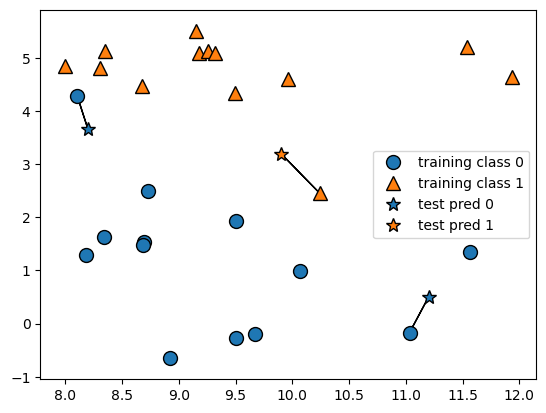

In [5]:
# 最近傍点数 1
mglearn.plots.plot_knn_classification(n_neighbors = 1)

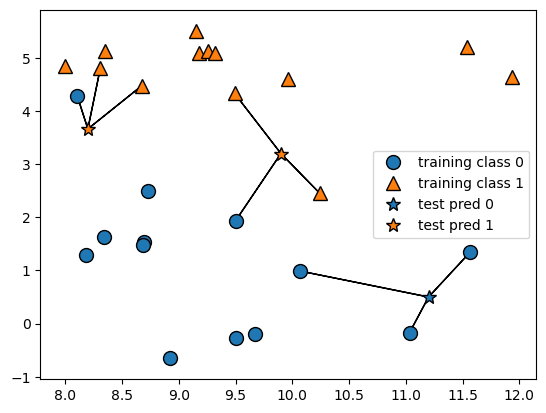

In [7]:
# 最近傍点数 3
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [9]:
#　訓練用データとテスト用データに分けた
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [11]:
# クラスをインポートしてインスタンスを生成
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [13]:
# 練習用データを用いてクラス分類を学習
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# X_testを用いてクラスを予想する
print('Test set predictions:{}'.format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [17]:
# 正答率を表示
print('Test set accuracy:{:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy:0.86


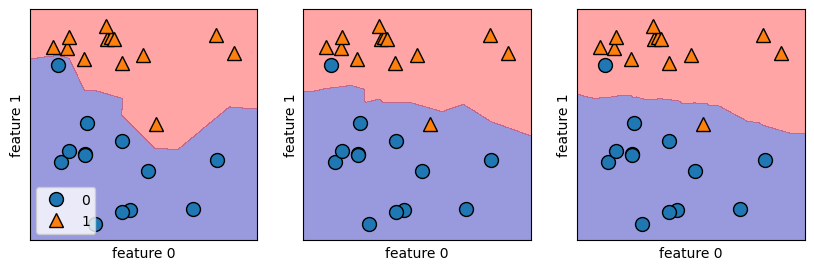

In [19]:
# 最近傍点数と決定境界の変化
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    axes[0].legend(loc = 3)

In [21]:
# 乳がんのデータセット
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

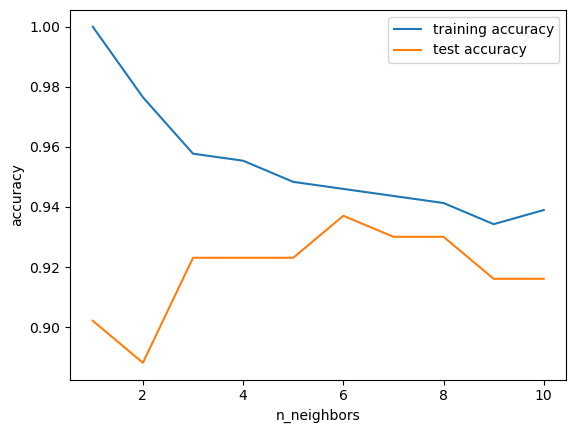

In [23]:
# 最近傍点数に対する訓練精度とテスト精度の比較
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66) # 練習データとテストデータに分割  
# stratifyを使用すると学習データと評価データで正解ラベルの割合が均一となる

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)    # 最近傍点数を1~10に設定

for n_neighbors in neighbors_settings: # 0-n_neighbors-9
    clf = KNeighborsClassifier(n_neighbors = n_neighbors) # インスタンスを生成
    clf.fit(X_train, y_train)                             # 練習用データで学習
    training_accuracy.append(clf.score(X_train, y_train)) # 練習用データの正答率をtraining_accuracyに記録
    test_accuracy.append(clf.score(X_test, y_test))       # テスト用データの正答率をtest accuracyに記録

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [25]:
'''
cancer_data = pd.DataFrame(cancer.data, columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'])
cancer_data.head()

# 0:'malignant', 1:'benign'
cancer_target = pd.DataFrame(cancer.target, columns = ['target'])
cancer_target.head()
'''

"\ncancer_data = pd.DataFrame(cancer.data, columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',\n        'mean smoothness', 'mean compactness', 'mean concavity',\n        'mean concave points', 'mean symmetry', 'mean fractal dimension',\n        'radius error', 'texture error', 'perimeter error', 'area error',\n        'smoothness error', 'compactness error', 'concavity error',\n        'concave points error', 'symmetry error',\n        'fractal dimension error', 'worst radius', 'worst texture',\n        'worst perimeter', 'worst area', 'worst smoothness',\n        'worst compactness', 'worst concavity', 'worst concave points',\n        'worst symmetry', 'worst fractal dimension'])\ncancer_data.head()\n\n# 0:'malignant', 1:'benign'\ncancer_target = pd.DataFrame(cancer.target, columns = ['target'])\ncancer_target.head()\n"

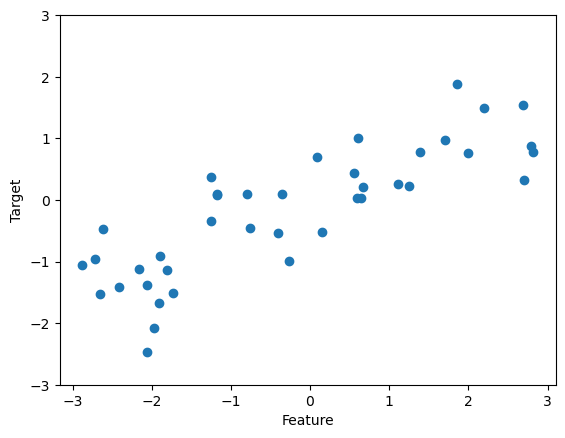

In [27]:
# waveデータセット
X, y = mglearn.datasets.make_wave(n_samples = 40)
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.set_ylim(-3, 3)
ax.set_xlabel('Feature')
ax.set_ylabel('Target')
plt.show()

In [29]:
'''
最近傍法（k近傍法, k-Nearest Neighbors / k-NN）による 回帰（regression）
1, 予測したい点xを与える
2, 学習データから最も近いk個の点（ユークリッド距離などで）を探す
3, そのk個の点のy値の平均値を計算する
4, それをxの予測値とする
'''

'\n最近傍法（k近傍法, k-Nearest Neighbors / k-NN）による 回帰（regression）\n1, 予測したい点xを与える\n2, 学習データから最も近いk個の点（ユークリッド距離などで）を探す\n3, そのk個の点のy値の平均値を計算する\n4, それをxの予測値とする\n'

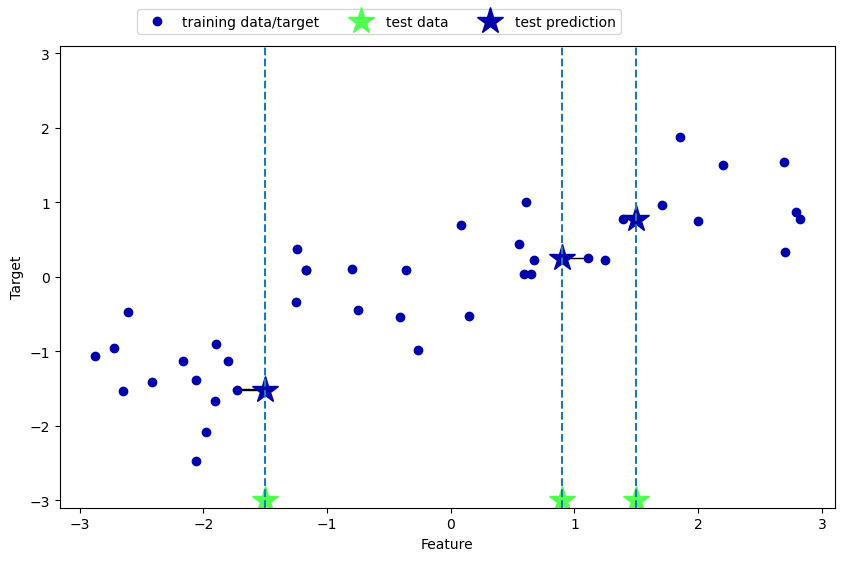

In [31]:
# 最近傍点数1の予測(回帰)
mglearn.plots.plot_knn_regression(n_neighbors = 1)

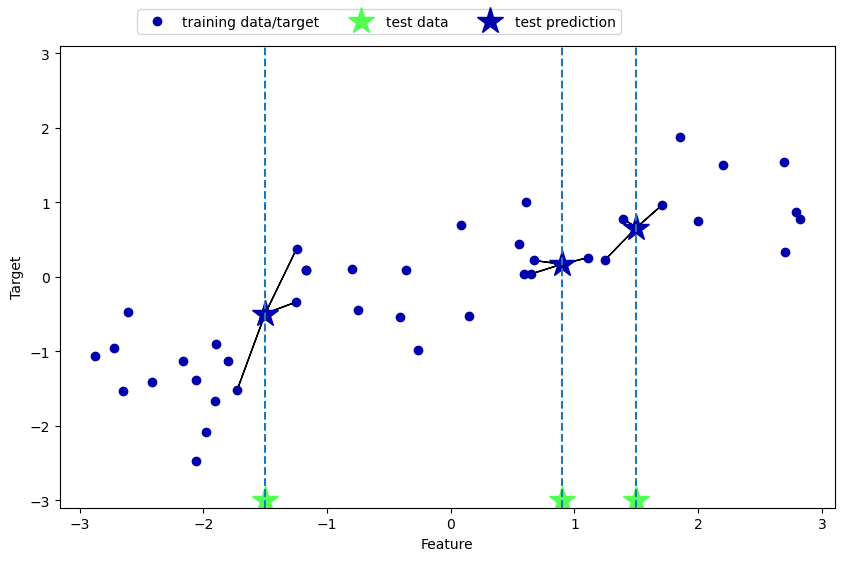

In [33]:
# 最近傍点数3の予測
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [35]:
# 回帰のためのk-最近傍点
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)  # 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg.fit(X_train, y_train)   # 練習用データを用いて学習
print('Test set predictions:\n{}'.format(reg.predict(X_test))) # テスト用データを当てはめて数値の予測
print('Test set R^2:{:.2f}'.format(reg.score(X_test, y_test))) # 決定係数を表示

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2:0.83


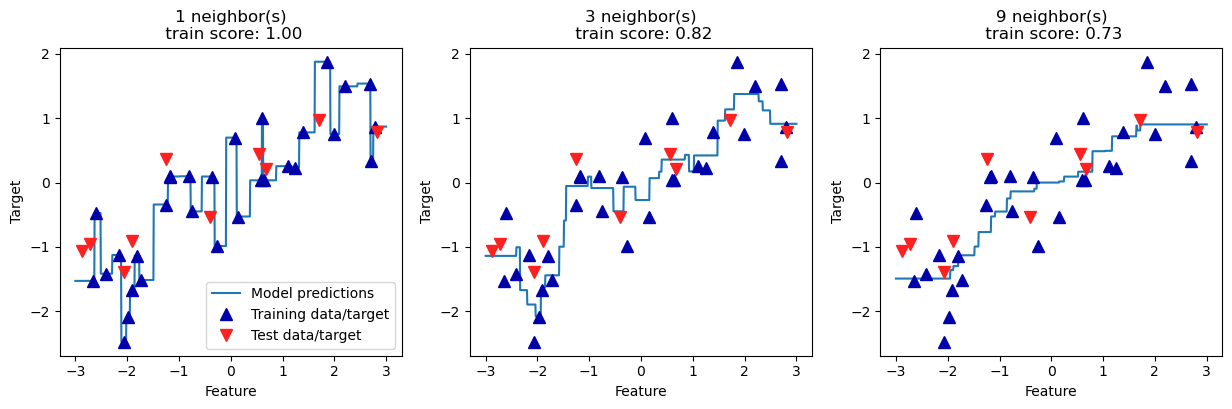

In [37]:
# KNeighborsRegressorの解析      最近傍点を少なくすると適合度は高くなるが、予測が不安定になる(ex: 1 neighbor)
import numpy as np
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', color = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', color = mglearn.cm2(1), markersize = 8)
    ax.set_title('{} neighbor(s)\n train score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc = 'best')

w[0]: 0.393906  b: -0.031804


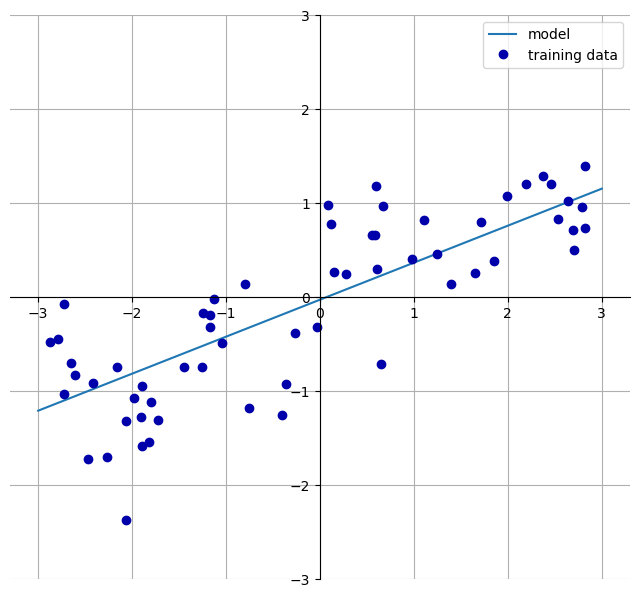

In [39]:
# 線形モデルによる回帰（最小二乗法）
mglearn.plots.plot_linear_regression_wave()

In [41]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)  
print('lr.coef_:{}'.format(lr.coef_))             # 今回はcoef_が一つしかないので指定していないが複数ある場合は[]で指定する
print('lr.intercept_:{}'.format(lr.intercept_))   # 訓練データから得られた属性には全て_をつける

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759704


In [43]:
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test))) # 訓練データとテストデータ共に精度が低い　→　モデルが単純なのでunderfittingの可能性 

Training set score:0.67
Test set score:0.66


In [45]:
# boston_housing datasets 特徴量:104, サンプル数:506
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test))) # 訓練データとテストデータで精度が大きく異なる → overfitting

Training set score:0.95
Test set score:0.61


In [46]:
# リッジ回帰:係数の絶対値の大きさを可能な限り小さくして、予測を上手く行いたい + 制約の強いモデルなのでoverfittingの危険は少ない
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) # defaultではalpha=1.0
print('Training set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


In [47]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train) # alpha=10にすると制約が大きくなる
print('Training set score:{:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


In [48]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


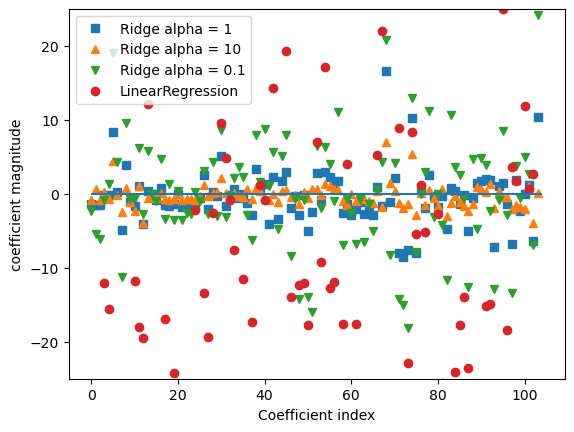

In [53]:
# alphaと回帰係数の変化
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha = 0.1')
plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_)) # plt.hlines(yの値, xの範囲, xの範囲)
plt.ylim(-25, 25)
plt.legend()

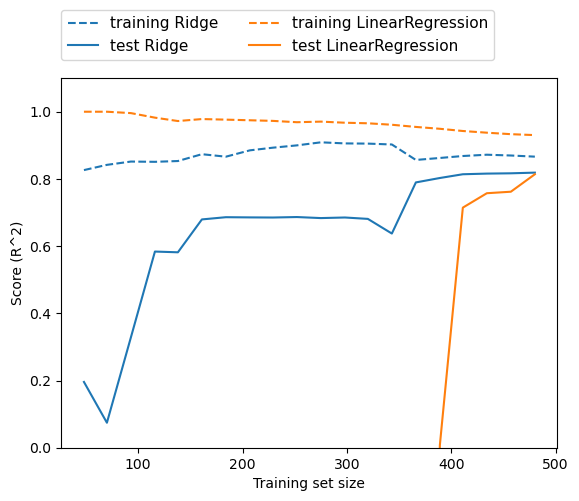

In [55]:
# 学習曲線:alphaの値を固定してデータサイズの大きさを変化させることで精度の変化を表す
'''
・訓練データの学習精度は線形回帰の方が高いが、テストデータの予測精度はリッジ回帰の方が高い
・データサイズが十分大きい場合は線形回帰とリッジ回帰に違いはなくなる
・データサイズが大きくなるにつれて訓練データの過学習が起こりにくくなる
'''
mglearn.plots.plot_ridge_n_samples()

In [56]:
# Lasso:いくつかの特徴量が無視されることで、モデルの解釈が容易になる
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso.coef_!= 0)))

Training set score:0.29
Test set score:0.21
Number of features used:4


In [59]:
'''
・alphaがdefault=1なので値を小さくすると制約が小さくなる。この際、max_iter(最大繰り返し回数)を増やさないと警告が出る
・alphaを小さくすると複雑なモデルに対応することができ、変数が少ないためモデルが理解しやすくなる
'''
lasso001 = Lasso(alpha = 0.01, max_iter = 1000000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso001.coef_!= 0)))

Training set score:0.90
Test set score:0.77
Number of features used:33


In [61]:
# alphaを小さくしすぎたことにより過学習が発生している
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso00001.coef_!= 0)))

Training set score:0.95
Test set score:0.64
Number of features used:96


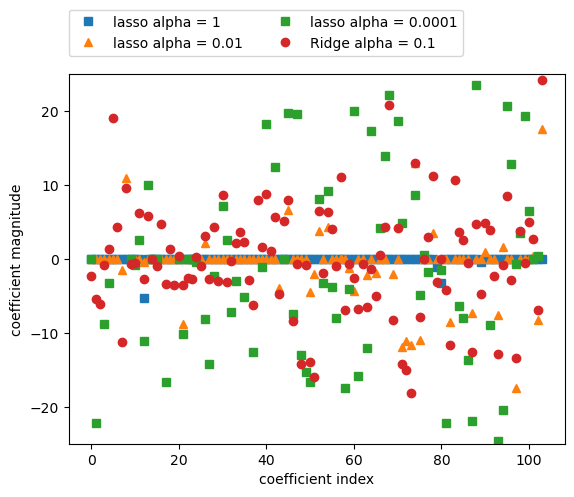

In [63]:
# alphaと回帰係数の変化
plt.plot(lasso.coef_, 's', label = 'lasso alpha = 1')
plt.plot(lasso001.coef_, '^', label = 'lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 's', label = 'lasso alpha = 0.0001')
plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-25, 25)
plt.legend(ncol = 2, loc = (0, 1.05))

In [65]:
# 実際に使用するときはまずリッジ回帰を試してから特徴量を減らしたい時にlassoを使用すると良い

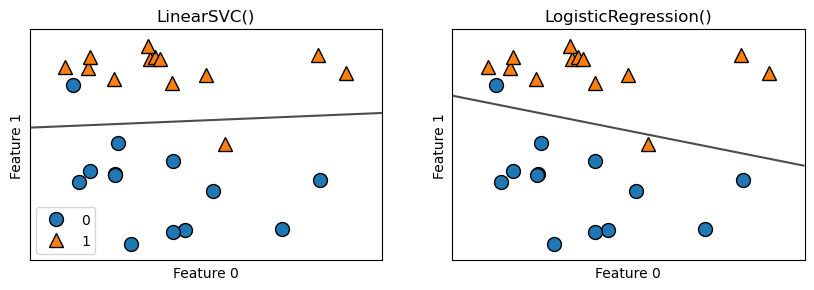

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3)) # axes:グラフを書く場所を指定

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title('{}'.format(clf))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()
plt.show()

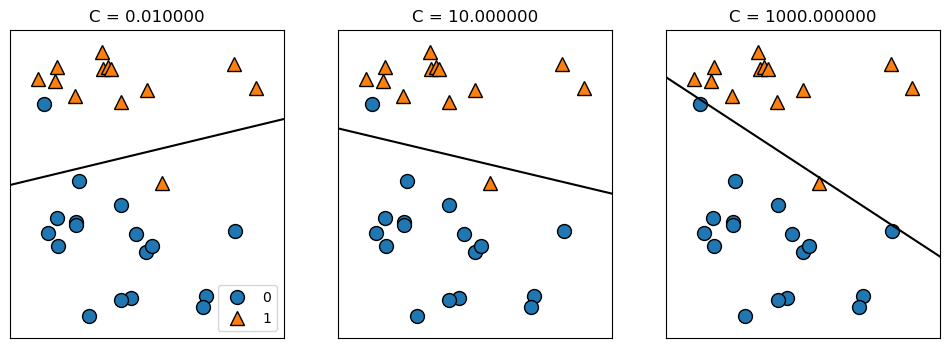

In [69]:
mglearn.plots.plot_linear_svc_regularization()

In [71]:
'''
L1正則化（Lasso：Least Absolute Shrinkage and Selection Operator)
数式：損失関数に 重みの絶対値の和 を加える
特徴
一部の重みが ゼロになる → 特徴選択（スパース性） に有効
ノイズの多いデータや、重要な特徴が少ないときに有利
用途例：高次元データ（例：テキストやゲノムデータ）での特徴選択

L2正則化（Ridge回帰）
数式：損失関数に 重みの二乗和 を加える
特徴
重みを ゼロにはしないが、小さくする（縮小する）
特徴量がすべて有用と考えられる場合に適している
数値が安定しやすく、解析しやすい
用途例：
線形回帰やロジスティック回帰の安定化
'''

'\nL1正則化（Lasso：Least Absolute Shrinkage and Selection Operator)\n数式：損失関数に 重みの絶対値の和 を加える\n特徴\n一部の重みが ゼロになる → 特徴選択（スパース性） に有効\nノイズの多いデータや、重要な特徴が少ないときに有利\n用途例：高次元データ（例：テキストやゲノムデータ）での特徴選択\n\nL2正則化（Ridge回帰）\n数式：損失関数に 重みの二乗和 を加える\n特徴\n重みを ゼロにはしないが、小さくする（縮小する）\n特徴量がすべて有用と考えられる場合に適している\n数値が安定しやすく、解析しやすい\n用途例：\n線形回帰やロジスティック回帰の安定化\n'

In [73]:
# ロジスティック回帰 L2正則化を使用
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg.score(X_test, y_test)))

Training set score:0.948
Test set score:0.951


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score:0.953
Test set score:0.965


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score:0.934
Test set score:0.930


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


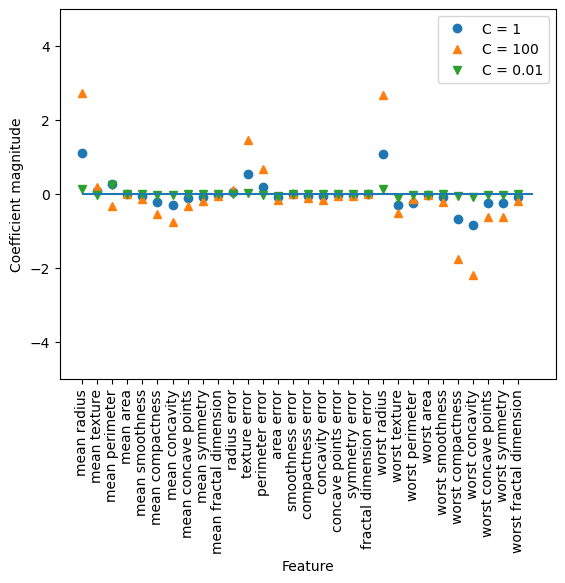

In [79]:
plt.plot(logreg.coef_.T, 'o', label = 'C = 1')
plt.plot(logreg100.coef_.T, '^', label = 'C = 100')
plt.plot(logreg001.coef_.T, 'v', label = 'C = 0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90) # 目盛りの数, ラベルの指定, 角度の指定
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


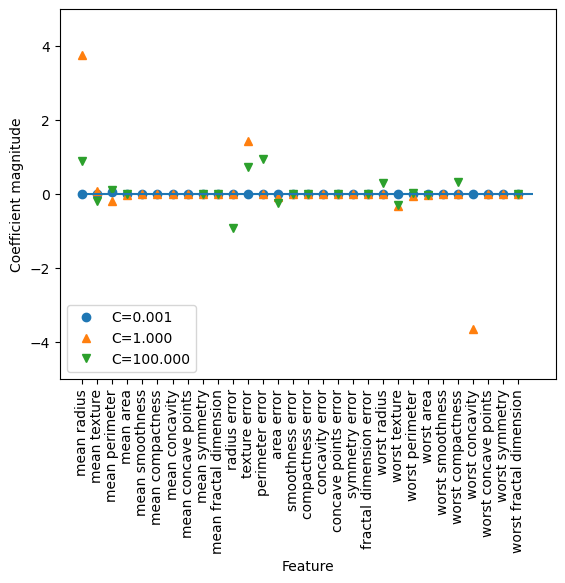

In [81]:
# L1正則化を使用
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C = C, penalty = "l1", solver = 'liblinear').fit(X_train, y_train)
    print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = 'C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5, 5)
plt.legend(loc = 3)
plt.show()

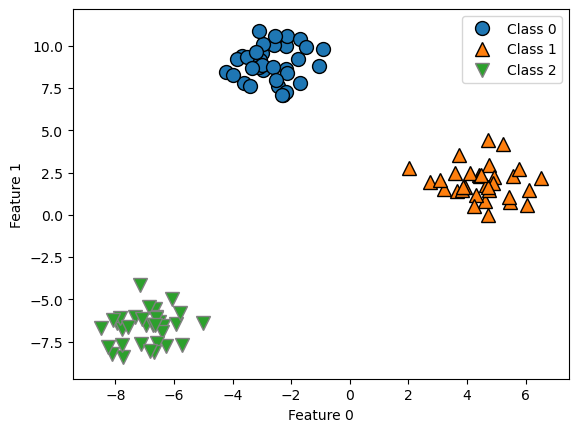

In [83]:
# 線形モデルによる多クラス分類
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [85]:
# LinearSVCクラス分類器を使用
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape) # 行:各クラスに対応する係数ベクトル, 列:個々の特徴量 
print('Intercept shape: ', linear_svm.intercept_.shape) # 各クラスの切片が格納

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


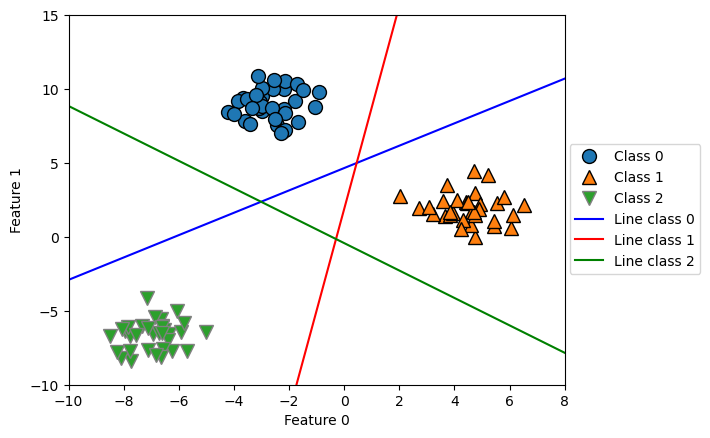

In [87]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)  # defaultは50分割
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color) # coef[0] * x + coef[1] * y + w2 = 0 を変形し、y=の形にする
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))
plt.show()

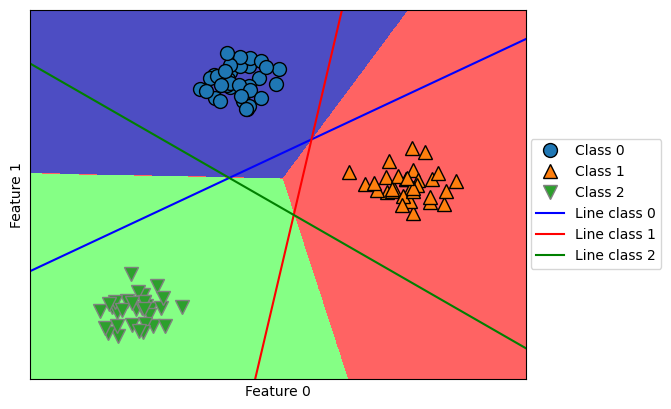

In [89]:
# 3つの1対その他クラス分類器による他クラス分類の決定境界
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)  # defaultは50分割
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color) # coef[0] * x + coef[1] * y + w2 = 0 を変形し、y=の形にする
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))
plt.show()

In [91]:
# ナイーブベイズクラス分類器
X = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0) # y=0となるXを取り出し縦方向に足し算する
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


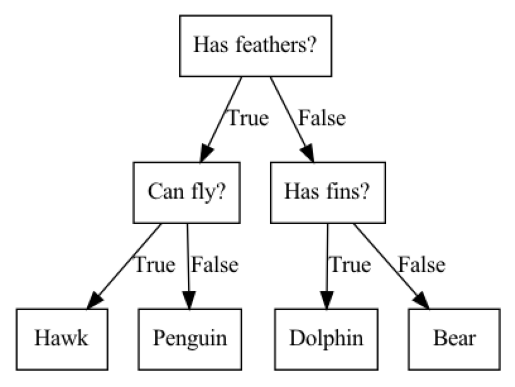

In [93]:
# 決定木
import mglearn
mglearn.plots.plot_animal_tree()  # pydotをインストールしたら表示された

In [95]:
# 決定木(純粋な葉になるまで構築) 過学習になっている
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [97]:
# 木の深さを4つに制限している
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


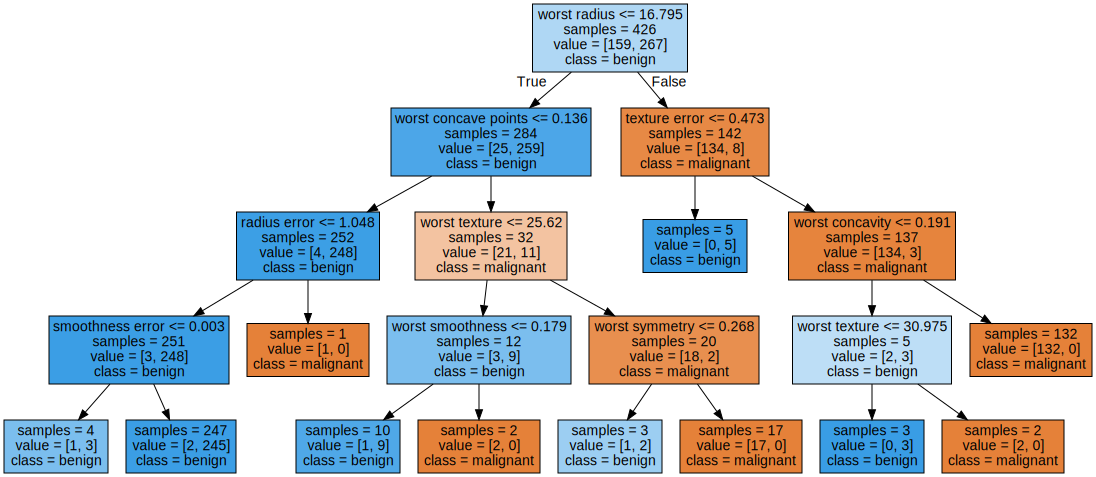

In [99]:
# 決定木の図示　検証方法:大多数のデータがたどるパスを見つけること
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['malignant', 'benign'], 
                feature_names = cancer.feature_names, impurity = False, filled = True)
'''
tree: 決定木モデル（例：DecisionTreeClassifierで学習させたもの）
out_file='tree.dot': Graphviz用の .dot ファイルとして出力し、ファイル名は "tree.dot"
class_names=['malignant', 'benign']: 予測するクラスの名前:応答変数（ここでは乳がんデータセットで使われるクラス）
feature_names=cancer.feature_names: 特徴量の名前（説明変数の名前）
impurity=False: ノード内の不純度（ジニ係数やエントロピー）を表示しない
filled=True: ノードの色をクラスごとに塗りつぶす（視覚的に分かりやすくなる）
'''

import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [101]:
# 決定木の特徴量の重要性 .feature_importances_
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


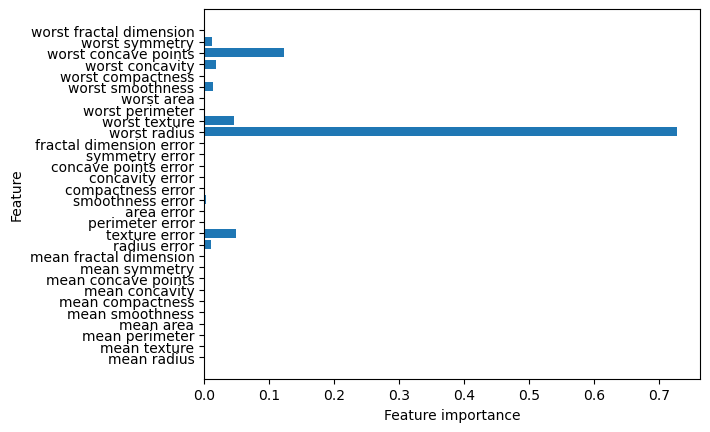

In [103]:
# 特徴量の重要度の可視化 .feature_importances_
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center') # 横棒グラフ plt.barh(棒グラフのラベル、xの数値, align:ラベルを合わせる位置)
    plt.yticks(np.arange(n_features), cancer.feature_names) # y軸のラベルの数とラベルの設定
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


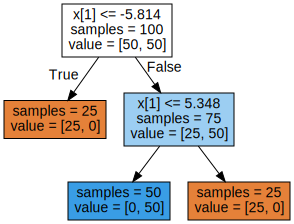

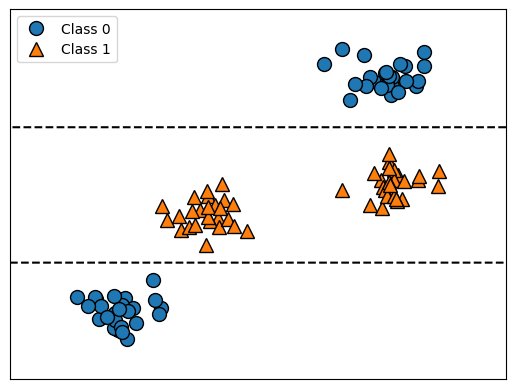

In [105]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

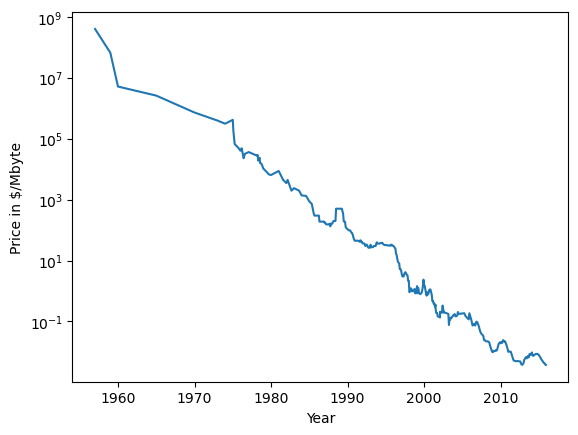

In [107]:
import os  # オペレーティングシステム（OS）と相互作用するための標準ライブラリ
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))  #os.path.join:引数に渡した2つの文字列を結合し、1つのパスにする
plt.semilogy(ram_prices.date, ram_prices.price) # semilogy: y軸が対数グラフになる (semi:半分 + log + y)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

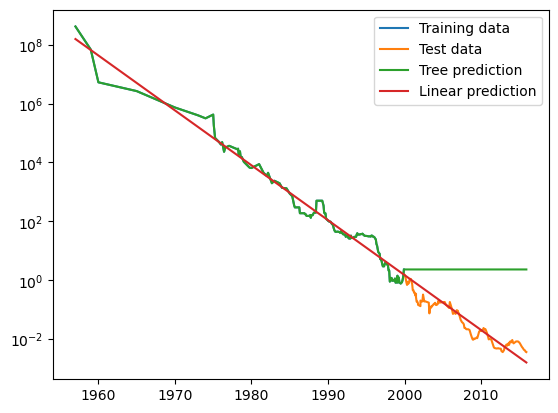

In [109]:
# 決定木と線形モデルの比較　
'''
決定木は訓練データにない領域は新しい答えを生成することができない
事前枝刈りを行ったとしてもoverfittingを起こしやすく、汎化性能が低い傾向がある
'''
from sklearn.tree import DecisionTreeRegressor
# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#日付に基づいて価格を予想
X_train = np.array(data_train.date)[:, np.newaxis] # 1次元配列を２次元に変換  (.reshape(-1, 1)と同じ)
y_train = np.log(data_train.price) # データとターゲットの関係を単純にするために対数変換

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = np.array(ram_prices.date)[:, np.newaxis]  
pred_tree = tree.predict(X_all)   # 全ての価格を予想
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree) # 対数変換をキャンセルするために逆変換
price_lr = np.exp(pred_lr)     # 対数変換をキャンセルするために逆変換

plt.semilogy(data_train.date, data_train.price, label = 'Training data')
plt.semilogy(data_test.date, data_test.price, label = 'Test data')
plt.semilogy(ram_prices.date, price_tree, label = 'Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label = 'Linear prediction')
plt.legend()
plt.show()

In [111]:
# 決定木のアンサンブル法
# ランダムフォレスト
'''
広く使われている機械学習手法
決定木の利点を残したまま、欠点を一部補っている点で優れている(決定木の方が表現が簡単)
線形モデルより多くのメモリを消費し、訓練・予測にかかる時間も多い
実行時間やメモリが重要な場合は線形モデルを使用した方が良い
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, t_test = train_test_split(X, y, stratify = y, random_state = 42) # stratifyを使用すると学習データと評価データで正解ラベルの割合が均一となる
forest = RandomForestClassifier(n_estimators = 5, random_state = 2) # n_estimators:決定木を５つ作る, 
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

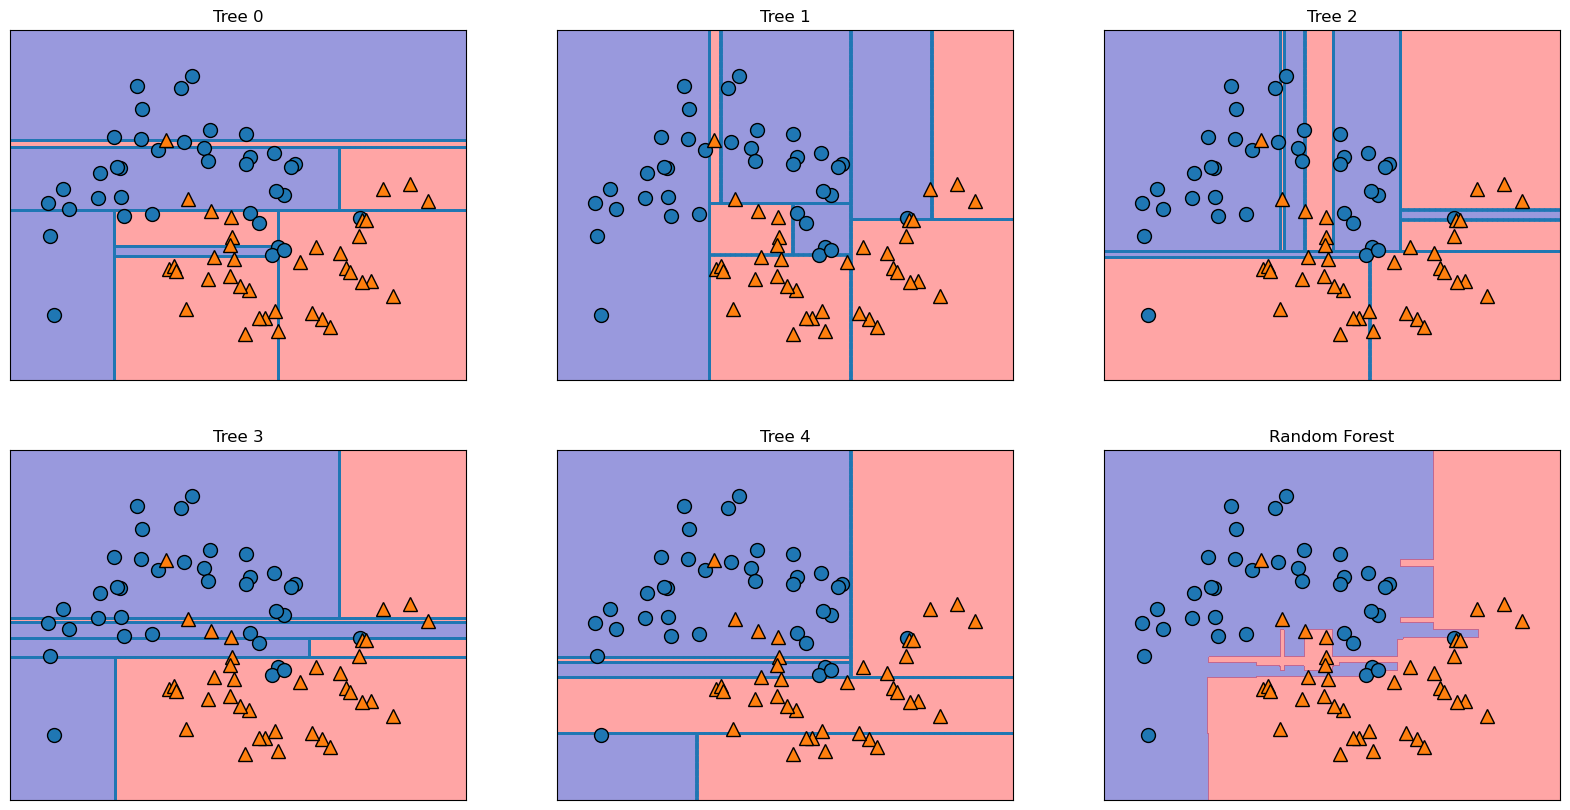

In [113]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10)) # enumerate:index番号とindexの要素を同時に表示する
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)): # ravel:一次元配列に変換する, forest.estimators_:構築した決定木を保存
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)

# 最後のグラフはforで作れないので別で作っている
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax = axes[-1, -1], alpha = 0.4) # axes[-1, -1]:一番最後の行で一番最後の列を指定
axes[-1, -1].set_title('Random Forest') 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0) # X:特徴量, y:cancerの良悪
forest = RandomForestClassifier(n_estimators = 100, random_state = 0) # 結果を再現可能にしたいならrandom_stateを付けておく
forest.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


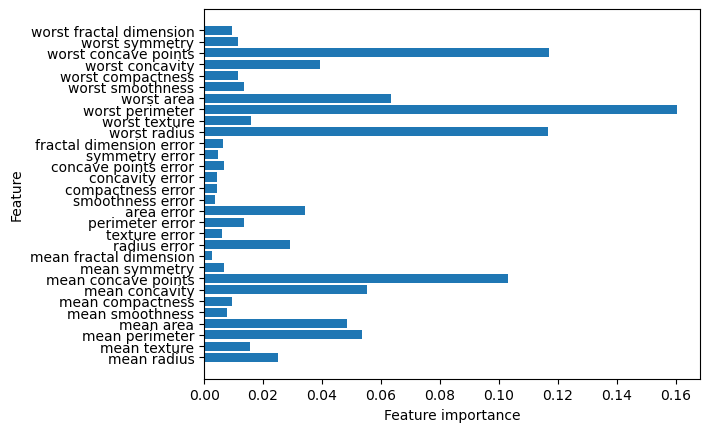

In [117]:
# 横棒グラフで特徴量の重要度を示す
plot_feature_importances_cancer(forest)

In [119]:
#勾配ブースティング回帰木(勾配ブースティングマシン)
'''
１つ前の決定木の誤りを次の決定木が修正するようにして、決定木を作っていく
浅い決定木のような簡単なモデルを多数組み合わせることが特徴
ランダムフォレストと比べるとパラメータの影響を受けやすいが、正しく設定すれば性能が高い
訓練にかかる時間が長いことが欠点
'''

from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train))) # 訓練データへの適合度が100%なのでoverfittingになっている
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [121]:
# overfittingを軽減するためには深さの最大値を制限 or 強力な事前枝刈り or 学習率を下げる
# 深さの最大値を制限
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train))) 
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [123]:
# 学習率を下げる
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train))) 
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


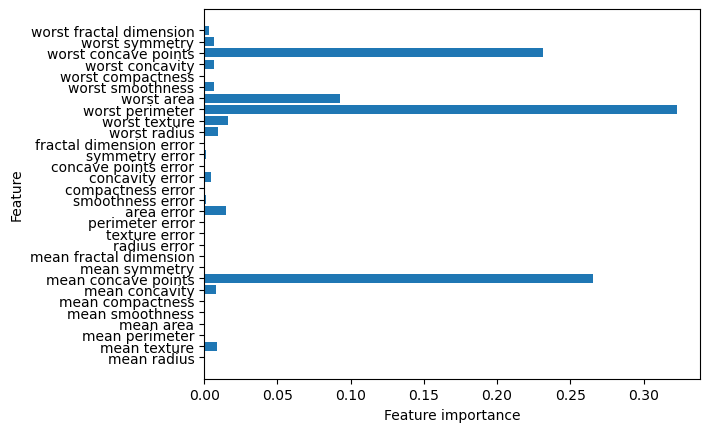

In [125]:
# 特徴量の重要度を可視化
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

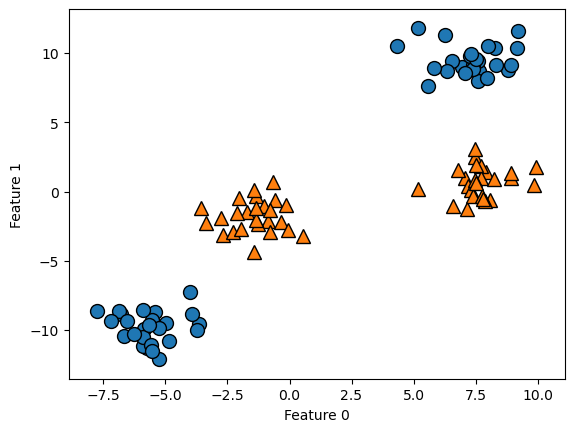

In [127]:
# カーネル法を用いたサポートベクタマシン
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

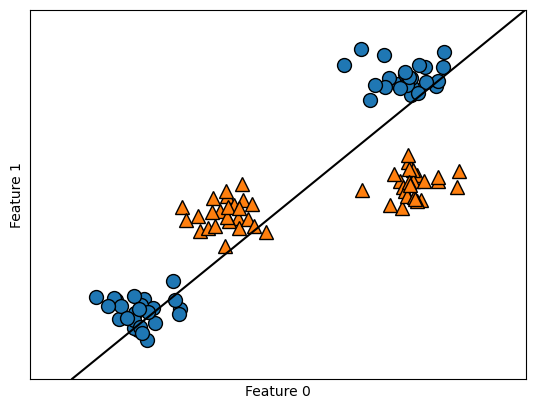

In [129]:
# 線形モデルによるクラス分類
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

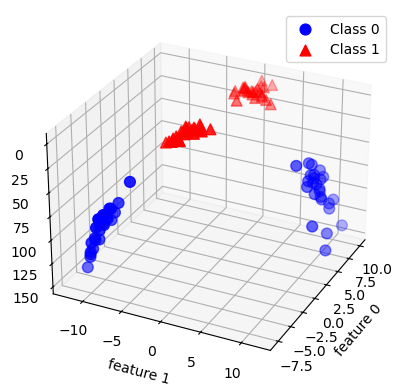

In [131]:
# 新しい特徴量: 3次元化
X_new = np.hstack([X, X[:, 1:]**2]) # Xに新しい列としてXの1列を２乗したものを追加する
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # fig.add_subplot: plt.figure()にグラフを描画するためにsubplotを追加,  111:1行目1列の1番目
ax.view_init(elev=-152, azim=-26) # グラフの角度を変えている elev:Z軸に対する角度, azim:x-y軸に対する角度
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label="Class 0")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label="Class 1")
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')
plt.legend()
plt.show()

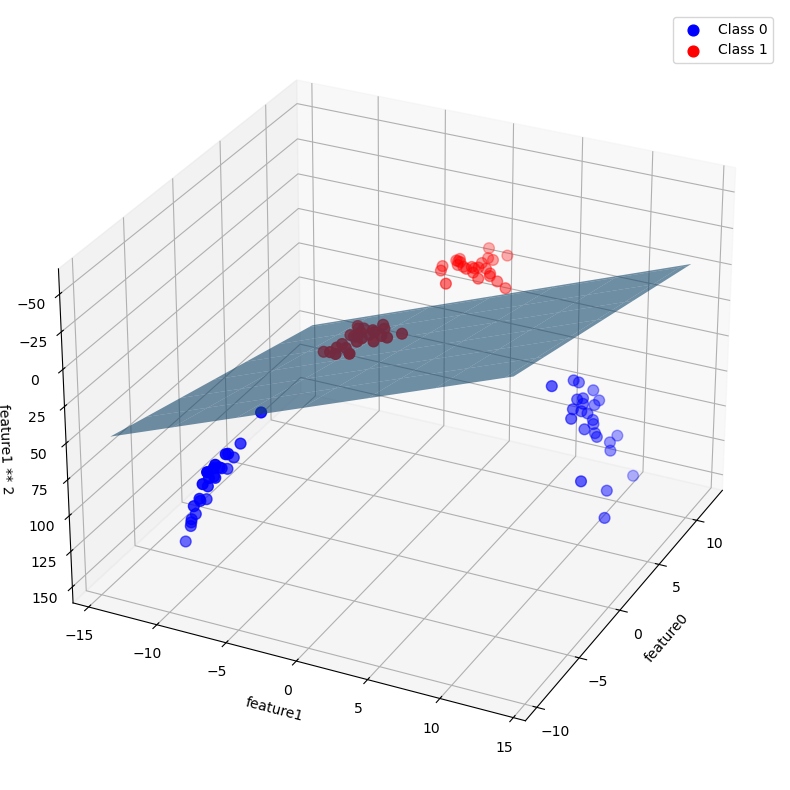

In [133]:
# 3次元データのクラス分類
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d') # 三次元グラフの作成
ax.view_init(elev=-152, azim=-26)            # 角度の調整
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)
xx, yy = np.meshgrid(xx, yy)
zz = (coef[0] * xx + coef[1] * yy + intercept) / -coef[2]
ax.plot_surface(xx, yy, zz, rstride = 8, cstride = 8, alpha = 0.6)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', s = 60, label="Class 0")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', s = 60, label="Class 1")
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')
plt.legend()
plt.tight_layout() # y軸のラベルが入るように調整
plt.show()

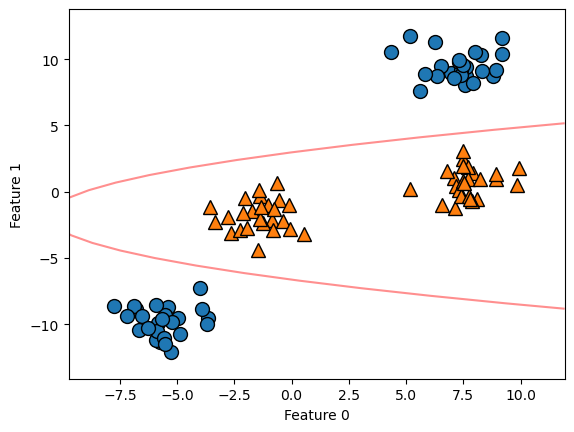

In [135]:
# 2次元で表示
zz = yy**2  #座標状のyyの値を２乗する (X_new[:, 2]ではデータサイズが異なる)
# xx, yy のグリッド上の点（x, y, y² = z）をすべて調べて、どのくらいSVMの境界から離れているかを計算している
dec = linear_svm_3d.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]) # np.c:列で結合

#dec.reshape:計算した判別関数の値を元のグリッド形に戻す, levels = 0: SVMの決定境界
plt.contour(xx, yy, dec.reshape(xx.shape), levels = [dec.min(), 0, dec.max()], cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

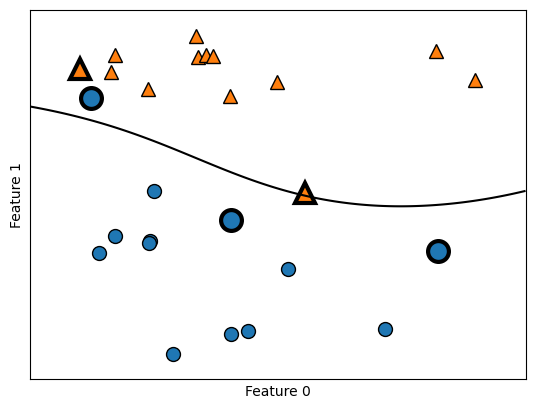

In [141]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y) # rbf:放射基底関数カーネル、gammma:ガウシアンカーネルの幅を調整する、C:正則化パラメータ
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  # データをプロット

# サポートベクタをプロットする
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)  # サポートベクタのみ外枠を囲む 
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

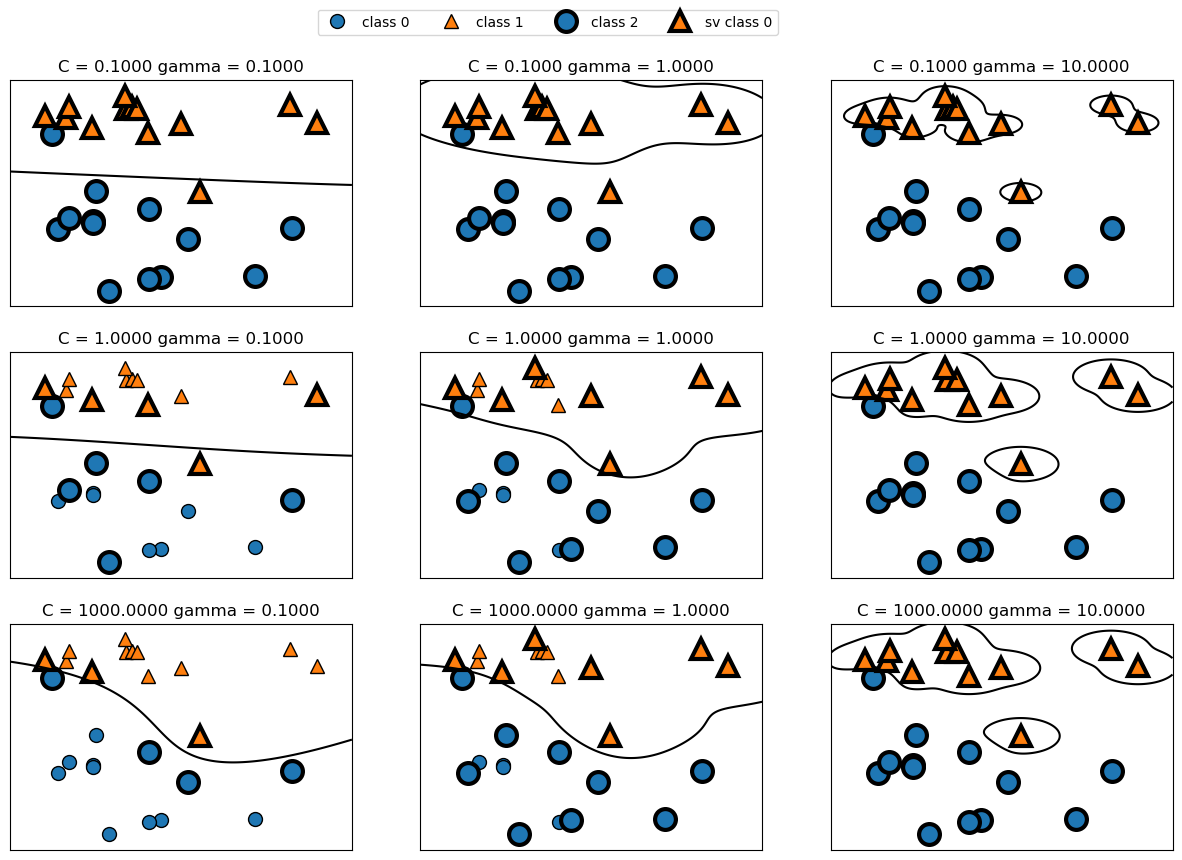

In [143]:
# SVMパラメータの調整
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(['class 0', 'class 1', 'class 2', 'sv class 0', 'sv class 1'], ncol = 4, loc = (0.9, 1.2))

In [145]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svc = SVC()
svc.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


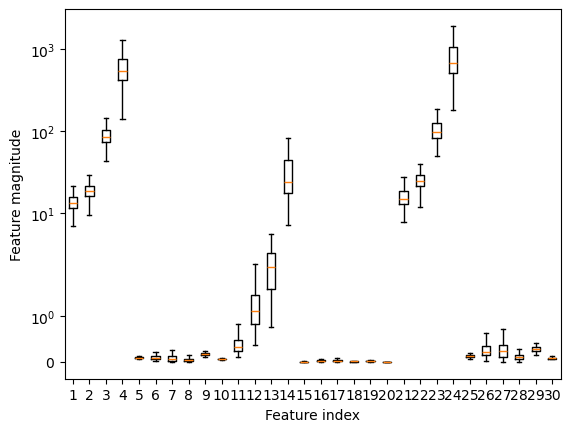

In [155]:
plt.boxplot(X_train, showfliers=False)
plt.yscale('symlog')
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.show()

In [157]:
# SVMのためのデータの前処理
# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis = 0)
# 訓練セットの特徴量ごとにレンジ(最大値 - 最小値)を計算
range_on_training = (X_train - min_on_training).max(axis = 0)

# 最小値を引いてレンジで割る
# 個々の特徴量は、min=0、max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print('Minimum for each feature\n{}'.format(X_train_scaled.min(axis = 0)))
print('Maximum for each feature\n{}'.format(X_train_scaled.max(axis = 0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [159]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [189]:
svc = SVC(C = 25)
svc.fit(X_train_scaled, y_train)
print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.986


In [ ]:
'''
SVMの特徴
強み
1. 高次元でも効果的
特徴量が多い（= 次元が高い）データに対して非常に効果的。
テキスト分類や遺伝子データのような高次元データに強い。
2. マージン最大化に基づいた理論
分類の境界を「最も安全な位置（=マージンが最大）」に置くため、汎化性能が高い。
過学習しにくい（特にカーネルトリックとハイパーパラメータの調整をすれば）。
3. 非線形分離にも対応
カーネル関数（例：RBFカーネル、ポリノミアルカーネル）を使えば、非線形なデータにも対応できる。
4. サポートベクターによるモデル構築
学習に使われるのは「サポートベクター（境界に近いデータ）」だけなので、計算効率が良い場合がある（学習データが多くないとき）。

弱み
1. 大規模データに弱い
学習データが多くなると、学習に時間がかかる。
特にハイパーパラメータの調整やカーネル法を使った場合は計算量が急増。
2. 多クラス分類への拡張が面倒
本来は二値分類アルゴリズム。多クラス分類には「1-vs-1」や「1-vs-rest」などの手法で拡張する必要がある。
3. ハイパーパラメータ調整が難しい
カーネルの種類、C（誤分類ペナルティ）、γ（RBFカーネル用）などのパラメータ選びがモデル性能に大きく影響。
4. スパース性がない予測
予測フェーズではサポートベクター全体を参照するため、予測が遅くなることがある（特にサポートベクターが多いとき）。
'''

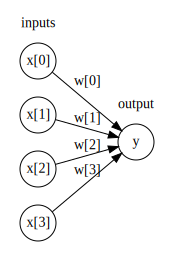

In [191]:
# ニューラルネットワーク
display(mglearn.plots.plot_logistic_regression_graph())

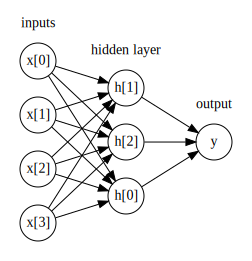

In [193]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

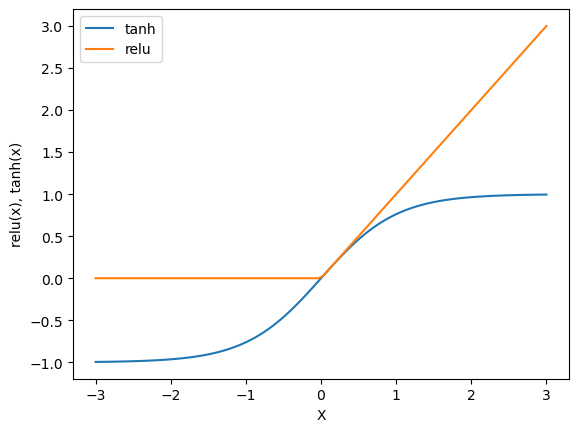

In [197]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0), label = 'relu')  # np.maximum(line, 0): lineに格納されている数字と0を比較して大きい方を表示する
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('relu(x), tanh(x)')

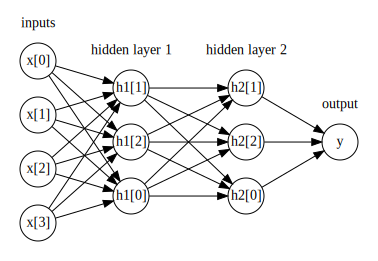

In [199]:
display(mglearn.plots.plot_two_hidden_layer_graph())

Text(0, 0.5, 'Feature 1')

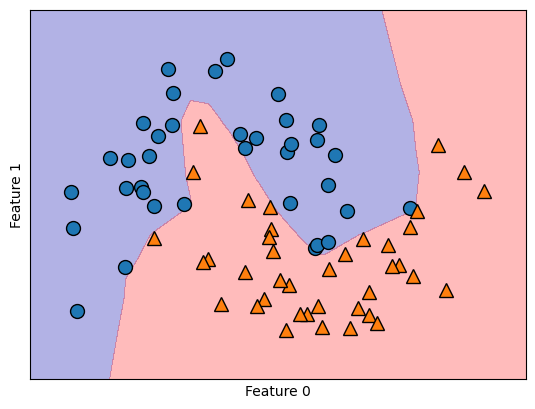

In [229]:
# ニューラルネットワークのチューニング
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train) # default:100隠れユニット(中間層)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

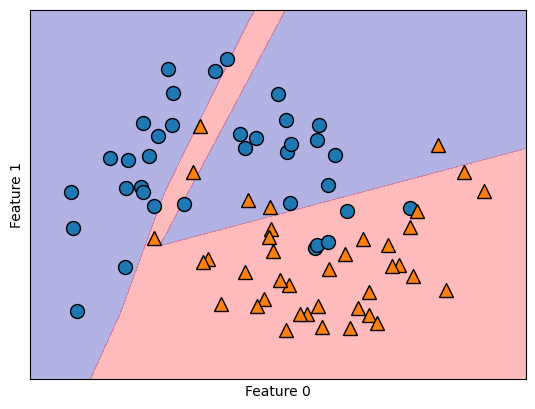

In [231]:
# 隠れユニットの数をデフォルトの100から10に減らした
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10]) # default:100隠れユニット(中間層のニューロンの数)
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

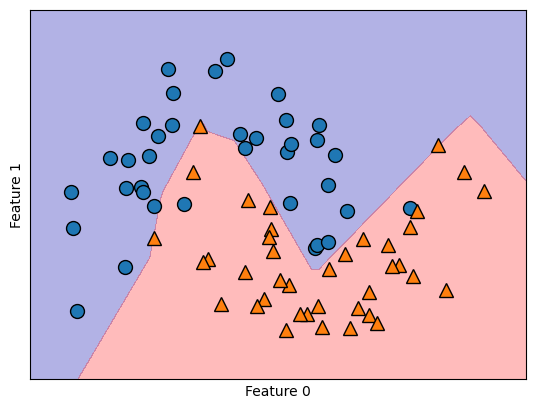

In [233]:
# 10ユニットの隠れ層を２層使用
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10, 10]) # hidden_layer_sizes = [10, 10]: 隠れ層を２層使用
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

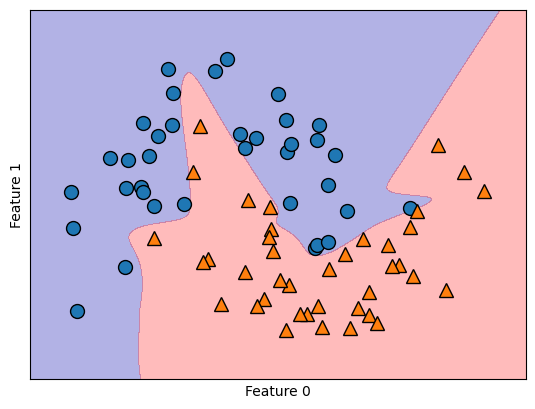

In [235]:
# 非線形活性化関数にtanhを使用
mlp = MLPClassifier(solver = 'lbfgs', activation = 'tanh', random_state = 0, hidden_layer_sizes = [10, 10]) 
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

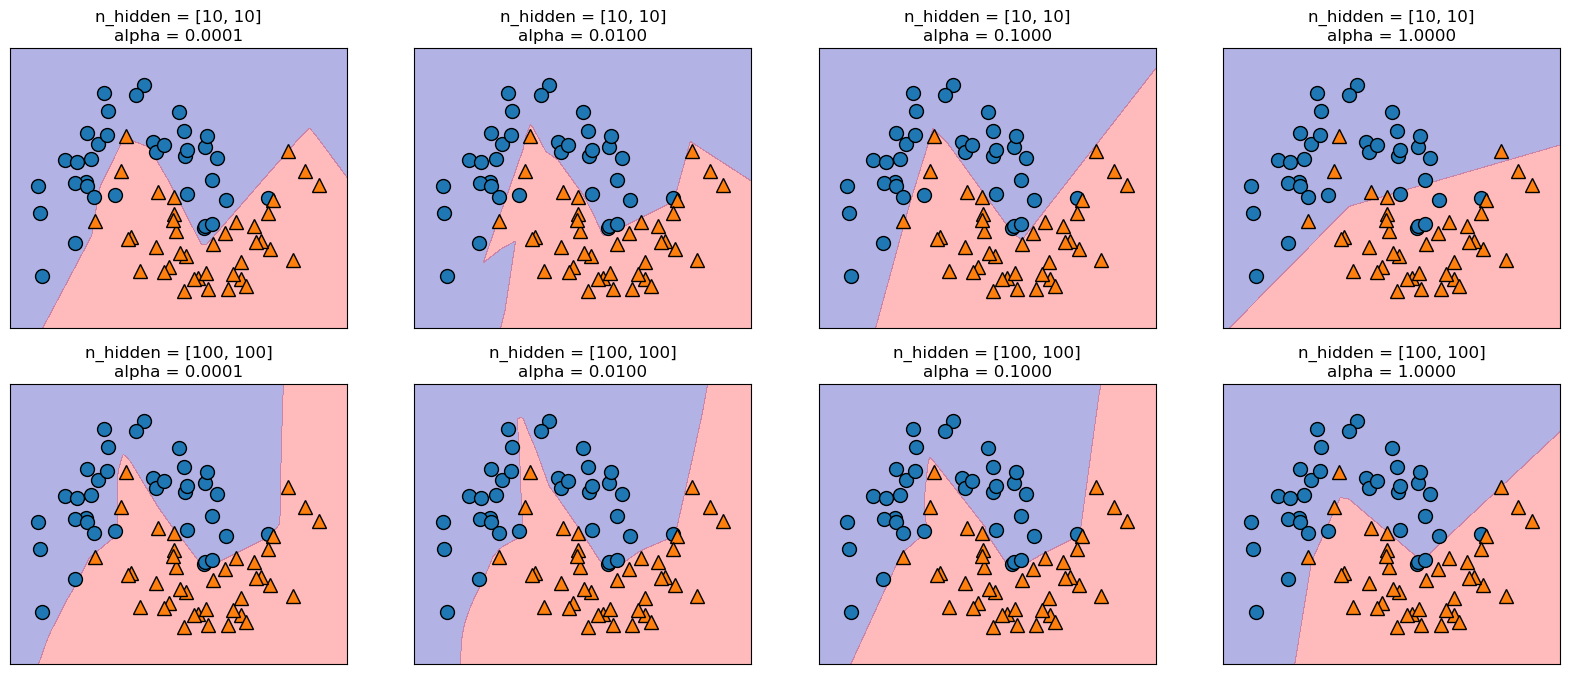

In [237]:
# 様々な隠れユニット数と正則化パラメータ(alpha)に対する決定境界
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver = 'lbfgs', max_iter = 1000, random_state = 0, hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes], alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title('n_hidden = [{}, {}]\nalpha = {:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
'''
ニューラルネットワークの複雑さを制御する方法
隠れ層の数(減らすと複雑さが減少する)
隠れ層のユニット数(減らすと複雑さが減少する)
正則化(alpha):値を大きくすると複雑さが減少する
'''

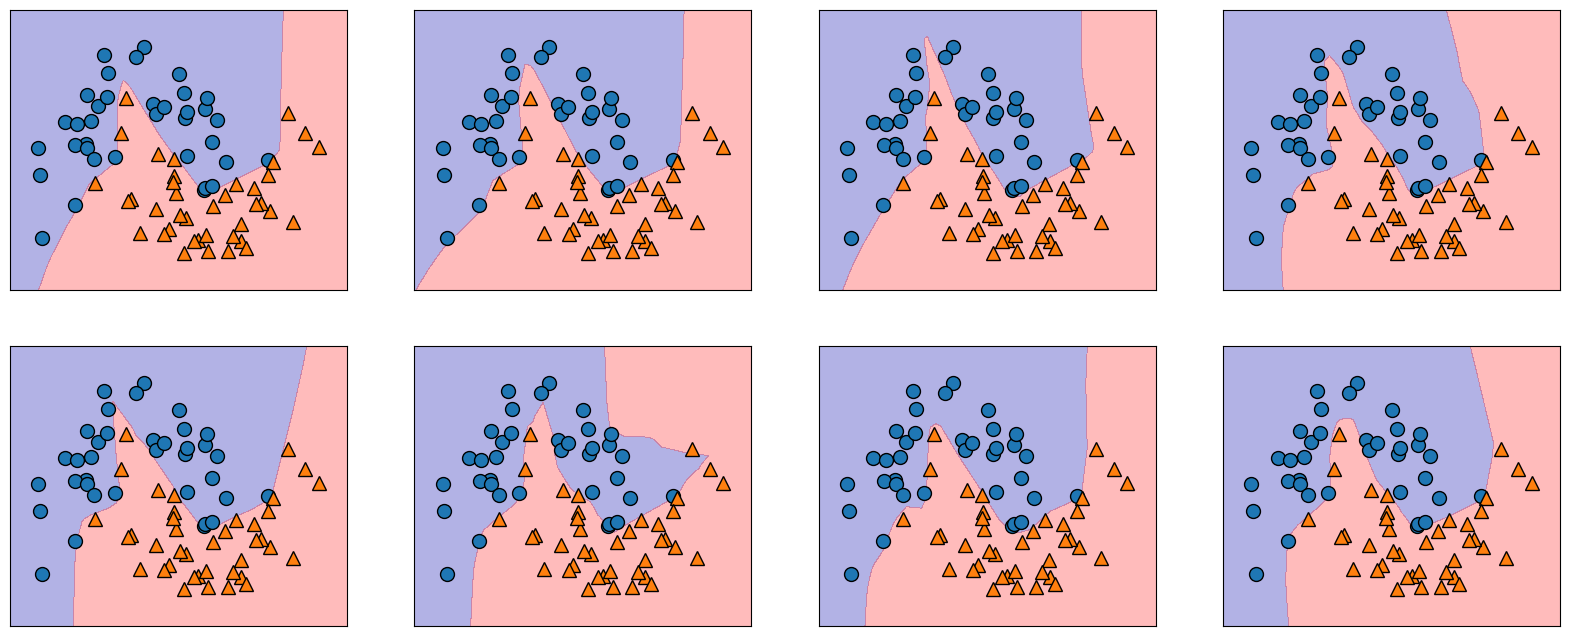

In [239]:
# 重みの初期値によって決定境界が変化することを示したグラフ
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for i, ax in enumerate(axes.ravel()):   # axes: 2*4=8 
    mlp = MLPClassifier(solver = 'lbfgs', max_iter = 1000, random_state = i, hidden_layer_sizes = [100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)

In [241]:
# cancer datasetの各特徴量の最大値
print('Cancer data per-feature maxima: \n{}'.format(cancer.data.max(axis = 0)))

Cancer data per-feature maxima: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [243]:
# cancer datasetにMLP(多層パーセプトロン)を適用し、適合率を表示
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [245]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis = 0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis = 0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)
print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [249]:
# 学習繰り返し回数を増やす
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)
print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [251]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)
print('Accuracy on training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


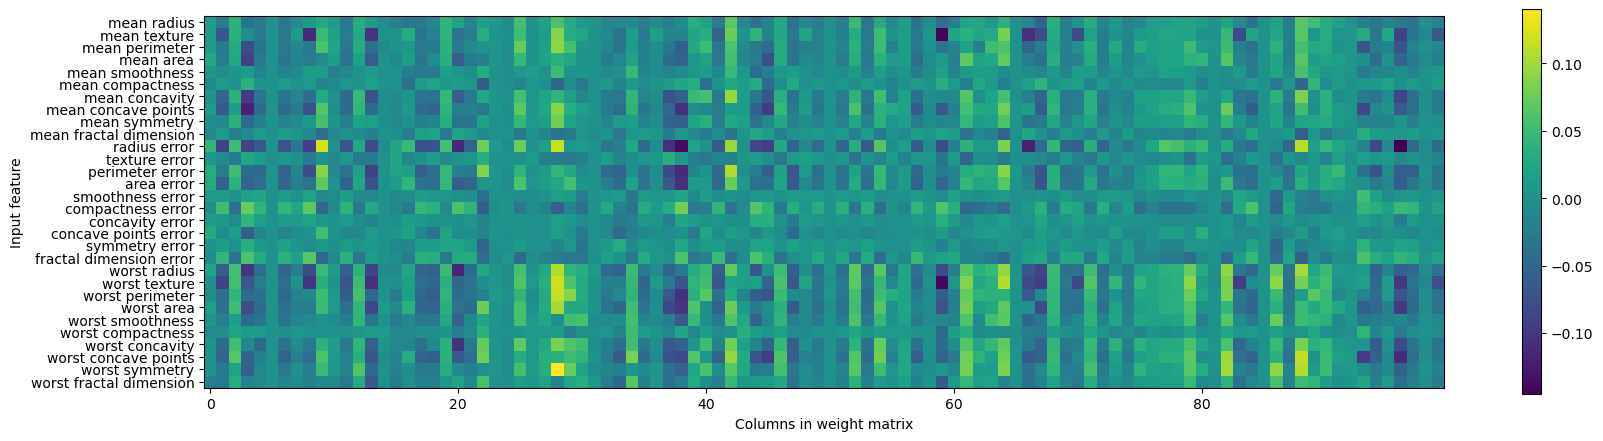

In [253]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [ ]:
'''
ニューラルネットワーク
強み
大量のデータを使って複雑なモデルを作ることができること
慎重にパラメータを調整できれば、他の機械学習アルゴリズムに勝てることが多い

弱み
大きくて強力なものは訓練に時間がかかる
データに前処理が必要
パラメータのチューニングが難しい場合もある
'''

In [281]:
# クラス分類器の不確実性推定
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1) # noise:データにノイズを加える量（値が大きいほどデータが散らばる), factor:内円と外円の半径の比率
# y_named = np.array(['blue', 'red'])[y]  # np.array(['blue', 'red'])[y] は、それぞれ 0 → 'blue', 1 → 'red' に変換
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [283]:
# 決定関数(decision function)
print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [285]:
# decision_functionの最初のいくつかを表示 符号が＋なら陽性1、-なら陰性0
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [287]:
print('Thresholded decision function:\n{}'.format(gbrt.decision_function(X_test) > 0))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]


In [291]:
# decision functionのレンジ
decision_function = gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f}  maximum: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69  maximum: 4.29


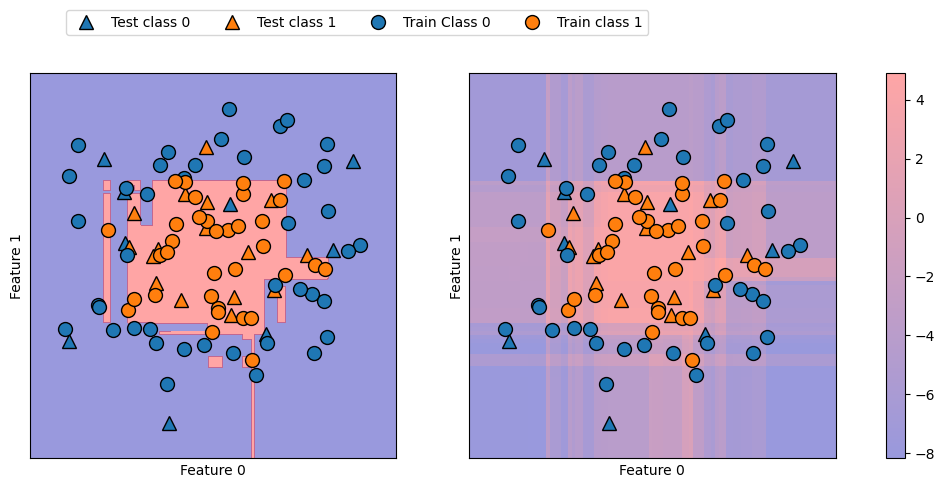

In [299]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = 0.4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = 0.4, cm = mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image, ax = axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train Class 0', 'Train class 1'], ncol = 4, loc = (0.1, 1.1))

In [301]:
# 確率の予測
print('Shape of probablities: {}'.format(gbrt.predict_proba(X_test).shape))

Shape of probablities: (25, 2)


In [303]:
print('Pridicted probablities:\n{}'.format(gbrt.predict_proba(X_test[:6])))

Pridicted probablities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


/var/folders/2n/k04q38yx087g0pz_q6w7gfd40000gn/T/ipykernel_5355/2787060739.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 1300x500 with 3 Axes> than <Figure size 1300x500 with 3 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scores_image, ax = axes.tolist())


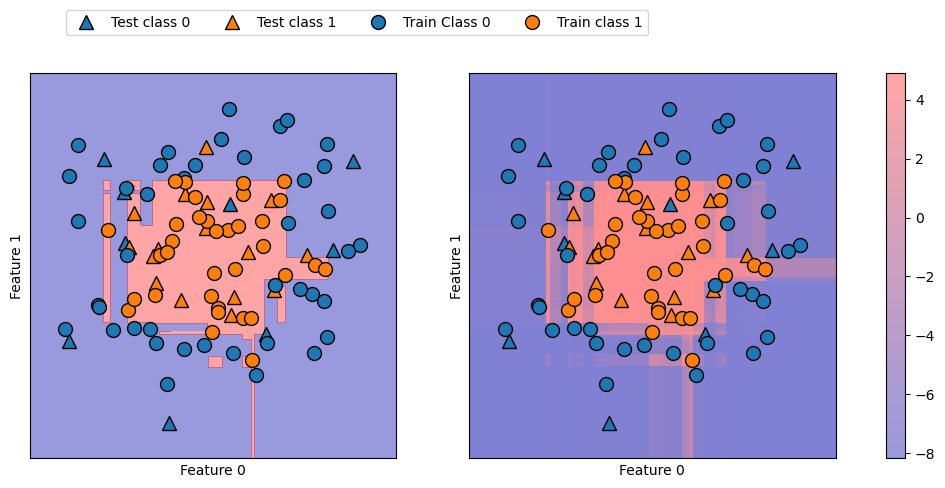

In [310]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = 0.4, fill = True, cm = mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = 0.5, cm = mglearn.ReBl, function = 'predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image, ax = axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train Class 0', 'Train class 1'], ncol = 4, loc = (0.1, 1.1))

In [316]:
# 多クラス分類の不確実性
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)
gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))
print('Decision function:\n{}'.format(gbrt.decision_function(X_test[:6])))

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]


In [318]:
print('Argmax of decision function:\n{}'.format(np.argmax(gbrt.decision_function(X_test), axis = 1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [322]:
print('Predicted probablities:\n{}'.format(gbrt.predict_proba(X_test)[:6]))
print('Sums: {}'.format(gbrt.predict_proba(X_test)[:6].sum(axis = 1)))

Predicted probablities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [324]:
print('Argmax of predicted probablities:\n{}'.format(np.argmax(gbrt.predict_proba(X_test), axis = 1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of predicted probablities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
